# Modeling

This notebook has a wide variety of modeling algorithms for a binary classification problem. It reads a file creatd from a feaature selection process that has a reasonably small number of good variables. We can explore # ionput variables, model algorithms and tune model hyperparameters. ASt the end we can select our favorite algorithm, run it again and build the final model performace score percentile tables.

In [5]:
from datetime import datetime
start_time = datetime.now()

import pandas as pd
import xgboost as XGBClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
%%time
vars = pd.read_csv('vars_final OK2.csv')
print(vars.shape)
vars.head()

(96397, 12)
CPU times: user 72.4 ms, sys: 31.5 ms, total: 104 ms
Wall time: 103 ms


,card_zip3_total_7,Merchnum_max_7,card_zip_total_14,card_zip_total_60,merch_zip_max_7,Card_Merchnum_desc_total_60,zip3_total_0,card_merch_total_30,card_zip_total_30,card_merch_total_60,Recnum,Fraud
0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,1,0
1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,2,0
2,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,3,0
3,3.62,3.62,3.62,3.62,3.62,3.62,7.24,3.62,3.62,3.62,4,0
4,7.24,3.62,7.24,7.24,3.62,7.24,10.86,7.24,7.24,7.24,5,0


In [7]:
final_vars = pd.read_csv('final_vars_list OK2.csv')
final_vars

,variable name
0,card_zip3_total_7
1,Merchnum_max_7
2,card_zip_total_14
3,card_zip_total_60
4,merch_zip_max_7
5,Card_Merchnum_desc_total_60
6,zip3_total_0
7,card_merch_total_30
8,card_zip_total_30
9,card_merch_total_60


In [8]:
vars.rename(columns={'recnum':'Recnum'},inplace=True)
numvars = min(15,len(final_vars))
final_vars_list = ['Recnum','Fraud']
for i in range(numvars):
    final_vars_list.append(final_vars.iloc[i]['variable name'])
    
final_vars_list

['Recnum',
 'Fraud',
 'card_zip3_total_7',
 'Merchnum_max_7',
 'card_zip_total_14',
 'card_zip_total_60',
 'merch_zip_max_7',
 'Card_Merchnum_desc_total_60',
 'zip3_total_0',
 'card_merch_total_30',
 'card_zip_total_30',
 'card_merch_total_60']

In [9]:
vars = vars.filter(final_vars_list,axis=1)
vars.head()

,Recnum,Fraud,card_zip3_total_7,Merchnum_max_7,card_zip_total_14,card_zip_total_60,merch_zip_max_7,Card_Merchnum_desc_total_60,zip3_total_0,card_merch_total_30,card_zip_total_30,card_merch_total_60
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,7.24,3.62,3.62,3.62
4,5,0,7.24,3.62,7.24,7.24,3.62,7.24,10.86,7.24,7.24,7.24


In [10]:
vars.shape

(96397, 12)

In [11]:
# use this to cap variables. For some problems it helps
Clip = 10

In [12]:
# vars.rename(columns={'fraud_label':'Fraud'},inplace=True)

In [13]:
vars['Fraud'].sum()

1059

In [14]:
vars.head(10)

,Recnum,Fraud,card_zip3_total_7,Merchnum_max_7,card_zip_total_14,card_zip_total_60,merch_zip_max_7,Card_Merchnum_desc_total_60,zip3_total_0,card_merch_total_30,card_zip_total_30,card_merch_total_60
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,7.24,3.62,3.62,3.62
4,5,0,7.24,3.62,7.24,7.24,3.62,7.24,10.86,7.24,7.24,7.24
5,6,0,3.67,3.67,3.67,3.67,3.67,3.67,14.53,3.67,3.67,3.67
6,7,0,3.62,3.67,3.62,3.62,3.67,3.62,18.15,3.62,3.62,3.62
7,8,0,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32
8,9,0,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11
9,10,0,10.86,3.67,10.86,10.86,3.67,10.86,21.77,10.86,10.86,10.86


In [15]:
vars.shape

(96397, 12)

In [16]:
vars.describe()

,Recnum,Fraud,card_zip3_total_7,Merchnum_max_7,card_zip_total_14,card_zip_total_60,merch_zip_max_7,Card_Merchnum_desc_total_60,zip3_total_0,card_merch_total_30,card_zip_total_30,card_merch_total_60
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.0000,96397.000000
mean,48365.481820,0.010986,766.708755,811.760529,806.656625,1266.636330,810.781862,1086.172428,1385.252825,922.819733,992.1012,1141.217228
std,27945.003883,0.104236,4137.374620,1342.561234,4186.923501,4651.346596,1342.127110,4546.365935,3305.170073,4298.907440,4346.6019,4551.733037
min,1.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.0100,0.010000
25%,24154.000000,0.000000,77.150000,125.000000,85.000000,132.530000,124.880000,68.820000,169.000000,93.790000,105.7500,108.810000
50%,48365.000000,0.000000,238.200000,389.970000,257.000000,410.000000,389.000000,277.670000,545.750000,289.680000,322.7800,348.790000
75%,72578.000000,0.000000,693.560000,1131.400000,718.640000,1178.840000,1128.960000,933.000000,1630.710000,824.680000,906.2700,1023.040000
max,96753.000000,1.000000,306633.410000,47900.000000,306633.410000,306633.410000,47900.000000,306633.410000,217467.180000,306633.410000,306633.4100,306633.410000


In [17]:
record_save = vars['Recnum']
Y_save = pd.DataFrame(vars.loc[:,'Fraud'])
Y_save.head()

,Fraud
0,0
1,0
2,0
3,0
4,0


## Scale and truncate field values

In [18]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

,card_zip3_total_7,Merchnum_max_7,card_zip_total_14,card_zip_total_60,merch_zip_max_7,Card_Merchnum_desc_total_60,zip3_total_0,card_merch_total_30,card_zip_total_30,card_merch_total_60
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.0000,96397.000000
mean,766.708755,811.760529,806.656625,1266.636330,810.781862,1086.172428,1385.252825,922.819733,992.1012,1141.217228
std,4137.374620,1342.561234,4186.923501,4651.346596,1342.127110,4546.365935,3305.170073,4298.907440,4346.6019,4551.733037
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.0100,0.010000
25%,77.150000,125.000000,85.000000,132.530000,124.880000,68.820000,169.000000,93.790000,105.7500,108.810000
50%,238.200000,389.970000,257.000000,410.000000,389.000000,277.670000,545.750000,289.680000,322.7800,348.790000
75%,693.560000,1131.400000,718.640000,1178.840000,1128.960000,933.000000,1630.710000,824.680000,906.2700,1023.040000
max,306633.410000,47900.000000,306633.410000,306633.410000,47900.000000,306633.410000,217467.180000,306633.410000,306633.4100,306633.410000


In [19]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [20]:
# push in any outlier values
cols = X.columns
X.loc[:,cols] = X[cols].clip(upper=Clip)
X.loc[:,cols] = X[cols].clip(lower=-1*Clip)
# X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

,card_zip3_total_7,Merchnum_max_7,card_zip_total_14,card_zip_total_60,merch_zip_max_7,Card_Merchnum_desc_total_60,zip3_total_0,card_merch_total_30,card_zip_total_30,card_merch_total_60
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,-0.012382,-0.009205,-0.012245,-0.010559,-0.009214,-0.010953,-0.009276,-0.011740,-0.011516,-0.010922
std,0.477940,0.851103,0.496200,0.631814,0.850917,0.606050,0.716087,0.537816,0.554095,0.607794
min,-0.185310,-0.604628,-0.192659,-0.272314,-0.604095,-0.238908,-0.419114,-0.214661,-0.228245,-0.250719
25%,-0.166666,-0.511530,-0.172360,-0.243823,-0.511056,-0.223773,-0.367985,-0.192847,-0.203918,-0.226816
50%,-0.127740,-0.314169,-0.131279,-0.184170,-0.314264,-0.177835,-0.253997,-0.147279,-0.153987,-0.174094
75%,-0.017680,0.238082,-0.021022,-0.018875,0.237070,-0.033691,0.074265,-0.022829,-0.019747,-0.025963
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [21]:
# separate data into modeling (traintest) and out of time
oot_recnum=84300
X_trntst = X[0:oot_recnum]
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

In [22]:
niter = 0
nitermax = 10
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

## Explore regularization

Solve a linear regression with ridge and lass regularization and watch how the variable weights evolve with the regularization strength

In [23]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import mean_squared_error

In [24]:
alphas = 10**np.linspace(7,-2,100)*0.5

In [25]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

In [26]:
ridge = Ridge()
coefs = []
for a in alphas: 
    ridge.set_params(alpha=a) 
    ridge.fit(X_trn,Y_trn.values.ravel()) 
    coefs.append(ridge.coef_) 
np.shape(coefs)

(100, 10)

Text(0.5, 1.0, 'Ridge')

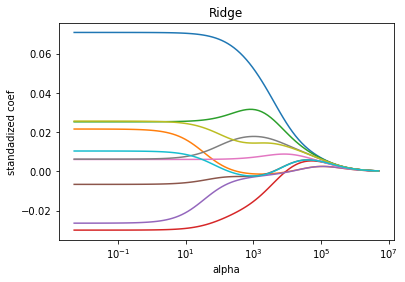

In [27]:
%matplotlib inline
ax = plt.gca() # Get the current Axes instance
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha') 
plt.ylabel('standadized coef') 
plt.title('Ridge')

In [28]:
alphas = 10**np.linspace(2,-8,100)*0.5

In [29]:
# sometimes this cell takes a long time
lasso = Lasso(max_iter=10000) 
coefs = [] 
for a in alphas: 
    lasso.set_params(alpha=a) 
    lasso.fit(X_trn,Y_trn.values.ravel()) 
    coefs.append(lasso.coef_) 
# print('Shape:',np.shape(coefs)
print('Selected Features:', list(vars.columns[np.where(lasso.coef_!=0)[0]]))

Selected Features: ['Recnum', 'Fraud', 'card_zip3_total_7', 'Merchnum_max_7', 'card_zip_total_14', 'card_zip_total_60', 'merch_zip_max_7', 'Card_Merchnum_desc_total_60', 'zip3_total_0', 'card_merch_total_30']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


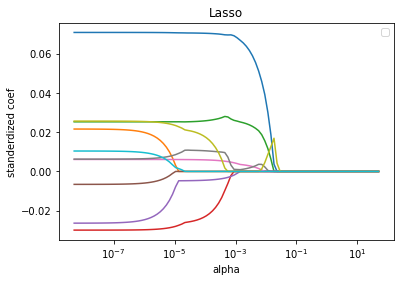

In [30]:
%matplotlib inline
ax = plt.gca() # Get the current Axes instance 
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('standerdized coef') 
plt.title('Lasso')
plt.legend()

## Models

You can comment out any of these model cells and just explore one model type. You can also just rerun that single cell multiple times as you explore different model hyperparameters.

In [31]:
Modeling_output = pd.DataFrame(columns=['Model','Trn','Tst','OOT'],index=range(1000))
counter = 0
model_counter = 0

In [37]:
%%time
# Logistic regression

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['log reg',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.6528662420382165 0.6468253968253969 0.35195530726256985
1 0.642504118616145 0.6593406593406593 0.3128491620111732
2 0.6426229508196721 0.662962962962963 0.3128491620111732
3 0.6372549019607843 0.6716417910447762 0.33519553072625696
4 0.6428571428571429 0.664 0.33519553072625696
5 0.6392914653784219 0.6718146718146718 0.329608938547486
6 0.6377295492487479 0.6761565836298933 0.329608938547486
7 0.6402535657686212 0.6586345381526104 0.3128491620111732
8 0.6403225806451613 0.65 0.3128491620111732
9 0.6363636363636364 0.6742424242424242 0.33519553072625696
trn    0.641207
tst    0.663562
oot    0.326816
dtype: float64
CPU times: user 24.1 s, sys: 3.85 s, total: 28 s
Wall time: 23.6 s


In [41]:
%%time
# Single DT

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = DecisionTreeClassifier(splitter = 'random', max_depth=50,min_samples_split=500,min_samples_leaf=50, max_features = None)
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['DT',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

0 0.6661184210526315 0.6176470588235294 0.5083798882681564
1 0.6331658291457286 0.6501766784452296 0.40782122905027934
2 0.6122778675282714 0.6168582375478927 0.3854748603351955
3 0.6985645933014354 0.6245059288537549 0.43575418994413406
4 0.6166666666666667 0.6071428571428571 0.48044692737430167
5 0.6623376623376623 0.6590909090909091 0.36312849162011174
6 0.6963434022257552 0.6733067729083665 0.4860335195530726
7 0.6705298013245033 0.6413043478260869 0.4134078212290503
8 0.6774193548387096 0.6269230769230769 0.33519553072625696
9 0.6738056013179572 0.6227106227106227 0.45251396648044695
trn    0.660723
tst    0.633967
oot    0.426816
dtype: float64
CPU times: user 560 ms, sys: 16.1 ms, total: 576 ms
Wall time: 572 ms


In [53]:
%%time
# RF

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=50,min_samples_leaf=50,max_features=5, bootstrap=False)
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['RF',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.7309562398703403 0.7490494296577946 0.5418994413407822
1 0.7495798319327731 0.7052631578947368 0.5418994413407822
2 0.6982055464926591 0.7116104868913857 0.5307262569832403
3 0.7213114754098361 0.6703703703703704 0.553072625698324
4 0.7102649006622517 0.7391304347826086 0.553072625698324
5 0.7269681742043551 0.6713780918727915 0.5363128491620112
6 0.6977124183006536 0.7574626865671642 0.5307262569832403
7 0.71334431630972 0.6813186813186813 0.553072625698324
8 0.7256198347107438 0.72 0.553072625698324
9 0.7057877813504824 0.7170542635658915 0.5195530726256983
trn    0.717975
tst    0.712264
oot    0.541341
dtype: float64
CPU times: user 2min 2s, sys: 182 ms, total: 2min 2s
Wall time: 2min 2s


In [31]:
%%time
# LGBM

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = lgb.LGBMClassifier(num_leaves=3,n_estimators=600)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.8581081081081081 0.8055555555555556 0.5754189944134078
1 0.8676470588235294 0.8097014925373134 0.5586592178770949
2 0.847723704866562 0.8436213991769548 0.5418994413407822
3 0.8543371522094927 0.7434944237918215 0.5642458100558659
4 0.8643790849673203 0.7985074626865671 0.5586592178770949
5 0.8508196721311475 0.8518518518518519 0.5586592178770949
6 0.8741830065359477 0.7649253731343284 0.5642458100558659
7 0.8528951486697965 0.8215767634854771 0.5698324022346368
8 0.8580750407830342 0.7827715355805244 0.5642458100558659
9 0.8444055944055944 0.7922077922077922 0.5698324022346368
trn    0.857257
tst    0.801421
oot    0.562570
dtype: float64
CPU times: user 46.1 s, sys: 416 ms, total: 46.6 s
Wall time: 5.98 s


In [44]:
%%time
# NN

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = MLPClassifier(hidden_layer_sizes=(200,),alpha=.005,solver='adam',activation='logistic',
                          max_iter=200,learning_rate='adaptive',learning_rate_init=.01)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['NN',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.6988727858293076 0.7258687258687259 0.547486033519553
1 0.7024 0.7098039215686275 0.5418994413407822
2 0.685337726523888 0.7142857142857143 0.5363128491620112
3 0.7156549520766773 0.6929133858267716 0.547486033519553
4 0.7086743044189853 0.6840148698884758 0.5418994413407822
5 0.7238095238095238 0.652 0.547486033519553
6 0.7090909090909091 0.6836363636363636 0.547486033519553
7 0.7051482059282371 0.6861924686192469 0.547486033519553
8 0.712241653418124 0.6852589641434262 0.547486033519553
9 0.7152428810720268 0.6784452296819788 0.547486033519553
trn    0.707647
tst    0.691242
oot    0.545251
dtype: float64
CPU times: user 4min 41s, sys: 7min 43s, total: 12min 24s
Wall time: 2min 40s


In [50]:
%%time
# GBC

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = GradientBoostingClassifier(learning_rate=0.001,max_depth=8,n_estimators=30, min_samples_split=50, min_samples_leaf=10)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['GBC',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.7830342577487766 0.7303370786516854 0.49162011173184356
1 0.7843803056027164 0.6907216494845361 0.4972067039106145
2 0.8249594813614263 0.7072243346007605 0.4581005586592179
3 0.7980613893376414 0.7011494252873564 0.4860335195530726
4 0.79585326953748 0.7114624505928854 0.40782122905027934
5 0.7879282218597063 0.7378277153558053 0.4301675977653631
6 0.792063492063492 0.696 0.5139664804469274
7 0.8297872340425532 0.7286245353159851 0.49162011173184356
8 0.8039538714991763 0.6776556776556777 0.46368715083798884
9 0.7921440261865794 0.6802973977695167 0.4860335195530726
trn    0.799217
tst    0.706130
oot    0.472626
dtype: float64
CPU times: user 1min 44s, sys: 287 ms, total: 1min 44s
Wall time: 1min 45s


In [34]:
# Catboost

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = CatBoostClassifier(verbose=0,
            iterations=100,
#             learning_rate=0.03,
#             l2_leaf_reg=5
    
    )
#

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['cat boost',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.8746031746031746 0.816 0.553072625698324
1 0.865506329113924 0.8145161290322581 0.5418994413407822
2 0.8876582278481012 0.8064516129032258 0.5251396648044693
3 0.8682432432432432 0.8263888888888888 0.547486033519553
4 0.8741721854304636 0.8369565217391305 0.547486033519553
5 0.8578352180936996 0.8084291187739464 0.5754189944134078
6 0.8629690048939641 0.8014981273408239 0.5307262569832403
7 0.8621794871794872 0.78125 0.553072625698324
8 0.8817891373801917 0.8110236220472441 0.5698324022346368
9 0.8783333333333333 0.775 0.4972067039106145
trn    0.871329
tst    0.807751
oot    0.544134
dtype: float64


In [47]:
%%time
# XGB

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = XGBClassifier(
        booster='gbtree',
        max_depth=5,
        gamma=0, 
        eta = 0.3,
        learning = 0.01,
        n_estimators = 5
    )

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['XGB',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

TypeError: 'module' object is not callable

In [36]:
%%time
# Knn

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = KNeighborsClassifier(n_neighbors=300) 
    
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['Knn',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.6811594202898551 0.6563706563706564 0.5363128491620112
1 0.6759868421052632 0.6544117647058824 0.5195530726256983
2 0.6773675762439807 0.7003891050583657 0.547486033519553
3 0.6892561983471074 0.6218181818181818 0.43575418994413406
4 0.6846986089644513 0.6523605150214592 0.5251396648044693
5 0.6820349761526232 0.6772908366533864 0.49162011173184356
6 0.6833602584814217 0.6666666666666666 0.5195530726256983
7 0.6650563607085346 0.6911196911196911 0.5307262569832403
8 0.6985172981878089 0.6007326007326007 0.39106145251396646
9 0.6644951140065146 0.7105263157894737 0.5418994413407822
trn    0.680193
tst    0.663169
oot    0.503911
dtype: float64
CPU times: user 3min 1s, sys: 6.81 s, total: 3min 8s
Wall time: 3min 14s


In [37]:
# %%time
# # SVM

# FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
# for niter in range(nitermax):  
#     X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

#     model = svm.SVC(
#         C=.1, 
# #         gamma=100,
# #         kernel='linear',
#         kernel='poly',
#         probability=True)
    
#     X_oot = X_oot_orig.copy()
#     X_trn_save = X_trn.copy()
#     Y_trn_save = Y_trn.copy()

#     model.fit(X_trn, Y_trn.values.ravel())   

#     predictions = model.predict_proba(X_trn_save)[:,1]
#     X_trn['predicted'] = predictions
#     X_trn['Fraud'] = Y_trn_save['Fraud']
#     topRows = int(round(X_trn.shape[0]*0.03))
#     temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_tst)[:,1]
#     X_tst['predicted']=predictions
#     X_tst['Fraud'] = Y_tst['Fraud']
#     topRows = int(round(X_tst.shape[0]*0.03))
#     temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_oot)[:,1]
#     X_oot['predicted']=predictions
#     X_oot['Fraud'] = Y_oot['Fraud']
#     topRows = int(round(X_oot.shape[0]*0.03))
#     temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
#     print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
#     Modeling_output.iloc[counter] = ['SVM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
#     counter = counter + 1
    
# print(FDR3.mean())
# model_counter = model_counter + 1

## Model comparison plots

In [38]:
model_counter

8

In [39]:
df = Modeling_output.dropna()
df.head()

,Model,Trn,Tst,OOT
0,log reg,0.640127,0.666667,0.324022
1,log reg,0.628019,0.679537,0.318436
2,log reg,0.654517,0.64257,0.324022
3,log reg,0.653333,0.65,0.391061
4,log reg,0.62623,0.692593,0.324022


In [40]:
df.shape

(80, 4)

In [41]:
df_unpivot = df.melt( id_vars='Model', value_vars=['Trn','Tst','OOT'], var_name=['Type'], value_name='Value')
df_unpivot.head()

,Model,Type,Value
0,log reg,Trn,0.640127
1,log reg,Trn,0.628019
2,log reg,Trn,0.654517
3,log reg,Trn,0.653333
4,log reg,Trn,0.62623


In [42]:
df_compare = df_unpivot[(df_unpivot['Type']=='Trn') | (df_unpivot['Type']=='Tst') | (df_unpivot['Type']=='OOT')]
df_compare.head()

,Model,Type,Value
0,log reg,Trn,0.640127
1,log reg,Trn,0.628019
2,log reg,Trn,0.654517
3,log reg,Trn,0.653333
4,log reg,Trn,0.62623


In [43]:
output = df.groupby('Model').agg({'Trn':['mean','std'],'Tst':['mean','std'],'OOT':['mean','std']})
output

Trn                 Tst                 OOT          
               mean       std      mean       std      mean       std
Model                                                                
DT         0.772807  0.014695  0.702483  0.012021  0.482123  0.043676
GBC        0.750814  0.015834  0.720412  0.031120  0.537430  0.008244
Knn        0.680193  0.010295  0.663169  0.034106  0.503911  0.051188
LGBM       0.857257  0.009259  0.801421  0.033241  0.562570  0.009142
NN         0.711927  0.015700  0.700389  0.022964  0.527374  0.038902
RF         0.774271  0.011930  0.720804  0.023080  0.553631  0.005555
cat boost  0.871329  0.009563  0.807751  0.018682  0.544134  0.022532
log reg    0.640927  0.011121  0.662173  0.022294  0.328492  0.022470

In [44]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,15))
# plt.rcParams.update({'font.size':20})
# ax = sns.boxplot(x='Model',y='Trn', data=df, color='navy')

# # Select which box you want to change    
# mybox = ax.artists[model_counter-1]

# # Change the appearance of that box
# mybox.set_facecolor('red')
# # mybox.set_edgecolor('black')
# # mybox.set_linewidth(3)
# plt.ylim(0,1)
# plt.xlabel('')
# plt.ylabel('Train Score (FDR3%)')
# plt.show()

In [45]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,15))
# ax = sns.boxplot(x='Model',y='Tst', data=df, color='navy')

# # Select which box you want to change    
# mybox = ax.artists[model_counter-1]

# # Change the appearance of that box
# mybox.set_facecolor('red')
# # mybox.set_edgecolor('black')
# # mybox.set_linewidth(3)
# plt.ylim(0,1)
# plt.xlabel('')
# plt.ylabel('Test Score (FDR3%)')
# plt.show()

In [46]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,15))
# ax = sns.boxplot(x='Model',y='OOT', data=df, color='navy')

# # Select which box you want to change    
# mybox = ax.artists[model_counter-1]

# # Change the appearance of that box
# mybox.set_facecolor('red')
# # mybox.set_edgecolor('black')
# # mybox.set_linewidth(3)
# plt.ylim(0,1)
# plt.xlabel('')
# plt.ylabel('OOT Score (FDR3%)')
# plt.show()

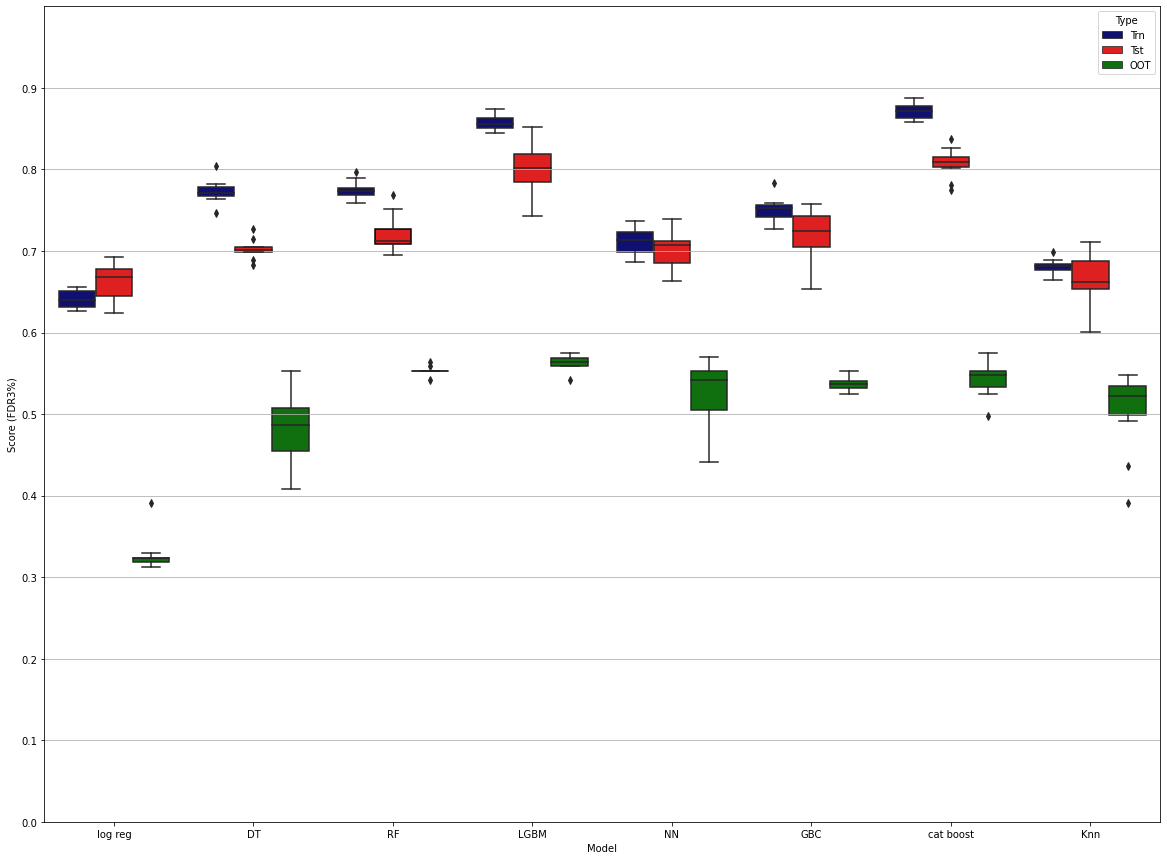

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
# ax = sns.boxplot(x='Model',y='OOT', data=df, color='navy')
ax = sns.boxplot(x='Model',y='Value',hue='Type', data=df_compare, palette=['navy','r','g'])
# Select which box you want to change    
mybox = ax.artists[model_counter-1]

# Change the appearance of that box
mybox.set_edgecolor('black')
# mybox.set_linewidth(3)
# plxlabelabel('')
plt.ylim(0,1)
plt.ylabel('Score (FDR3%)')
plt.yticks(np.arange(0,1,.1))
plt.grid(axis='y')
plt.savefig('modeling.png')
plt.show()

In [48]:
print('duration: ', datetime.now() - start_time)

duration:  0:15:43.188944


The rest of the notebook makes the tables for your final model of choice. You need to run that final model only once (no CV). If you want you can run the below cell over and over by itself until it gives you a model you like. But you can't change from your best hyperparameters.

In [49]:
%%time

for niter in range(30):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

# here's where you put your final model of choice
    model = lgb.LGBMClassifier(num_leaves=3,n_estimators=50)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    if(FDR3.loc[niter, 'oot'] > .56): break
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.7339901477832512 0.7047970479704797 0.5027932960893855
1 0.7197452229299363 0.7420634920634921 0.4972067039106145
2 0.7222222222222222 0.6993006993006993 0.49162011173184356
3 0.7129186602870813 0.7430830039525692 0.4860335195530726
4 0.7310126582278481 0.7258064516129032 0.4972067039106145
5 0.7302631578947368 0.7463235294117647 0.5027932960893855
6 0.7328990228013029 0.6917293233082706 0.49162011173184356
7 0.7409733124018838 0.6995884773662552 0.4972067039106145
8 0.7287066246056783 0.7398373983739838 0.5027932960893855
9 0.7317880794701986 0.7391304347826086 0.5027932960893855
10 0.734860883797054 0.7100371747211895 0.5586592178770949
11 0.7121464226289518 0.7204301075268817 0.5027932960893855
12 0.7266666666666667 0.7428571428571429 0.4972067039106145
13 0.7459546925566343 0.6679389312977099 0.4860335195530726
14 0.7306451612903225 0.7346153846153847 0.4748603351955307
15 0.7298578199052133 0.6842105263157895 0.4972067039106145
16 0.7303370786516854 0.6731517509727627 0.491620

In [50]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [51]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

,card_zip3_total_7,Merchnum_max_7,card_zip_total_14,card_zip_total_60,merch_zip_max_7,Card_Merchnum_desc_total_60,zip3_total_0,card_merch_total_30,card_zip_total_30,card_merch_total_60,predicted,Fraud
90369,7.596835,3.953540,1.268944,1.043352,3.955548,1.107139,1.549789,1.208868,1.179664,1.093740,0.855447,1
89082,5.336974,2.091614,5.264274,4.639760,2.093019,4.039575,-0.359610,5.100122,5.028220,4.768855,0.754284,1
89083,5.429325,2.091614,5.355532,4.721906,2.093019,4.123618,-0.244006,5.189002,5.116125,4.852798,0.754284,1
89077,5.289437,2.091614,5.217299,4.597476,2.093019,3.996314,6.434113,5.054370,4.982970,4.725645,0.740270,1
89074,5.044844,2.091614,4.975602,4.379911,2.093019,3.880173,6.127935,4.818969,4.750152,4.503318,0.740270,1
89068,4.327532,2.091614,4.266778,3.741861,2.093019,3.227390,5.230011,4.128610,4.067368,3.851305,0.740270,1
89075,5.161815,2.091614,5.091188,4.483956,2.093019,-0.132462,6.274357,4.931544,4.861492,4.609640,0.727359,1
89120,6.575506,2.091614,6.488149,5.741435,2.093019,4.754353,1.190770,6.292115,6.207134,5.894639,0.719282,1
89128,7.085336,2.091614,6.991946,6.194929,2.093019,5.218319,1.828970,6.782789,6.692423,6.358058,0.719282,1
89121,6.972016,2.091614,6.879966,6.094131,2.093019,5.115193,1.687117,6.673726,6.584557,6.255053,0.719282,1


In [52]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot
    
    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_oot

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,121.0,72.0,49.0,59.504132,40.495868,121.0,72.0,49.0,0.604128,27.374302,26.770173,1.469388
2,2.0,121.0,93.0,28.0,76.859504,23.140496,242.0,165.0,77.0,1.384460,43.016760,41.632299,2.142857
3,3.0,121.0,111.0,10.0,91.735537,8.264463,363.0,276.0,87.0,2.315825,48.603352,46.287527,3.172414
4,4.0,121.0,116.0,5.0,95.867769,4.132231,484.0,392.0,92.0,3.289142,51.396648,48.107506,4.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,121.0,121.0,0.0,100.000000,0.000000,11613.0,11435.0,178.0,95.947307,99.441341,3.494034,64.241573
97,97.0,121.0,120.0,1.0,99.173554,0.826446,11734.0,11555.0,179.0,96.954187,100.000000,3.045813,64.553073
98,98.0,121.0,121.0,0.0,100.000000,0.000000,11855.0,11676.0,179.0,97.969458,100.000000,2.030542,65.229050
99,99.0,121.0,121.0,0.0,100.000000,0.000000,11976.0,11797.0,179.0,98.984729,100.000000,1.015271,65.905028


In [53]:
FDR3.to_csv('FDR3.csv')

In [54]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

In [55]:
print("duration: ", datetime.now() - start_time)

duration:  0:15:49.088942
